=== Primerjava metod na matriki A1 ===

Referenčne lastne vrednosti (eigh):
 [ 999.82908751  999.86159725  999.91465698  999.98506851 1000.065552
 1000.14323324 1000.20080452]

QR metoda:
  Lastne vrednosti: [ 999.9999596   999.99999959 1000.         1000.         1000.
 1000.0000004  1000.00004041]
  Število iteracij: 2


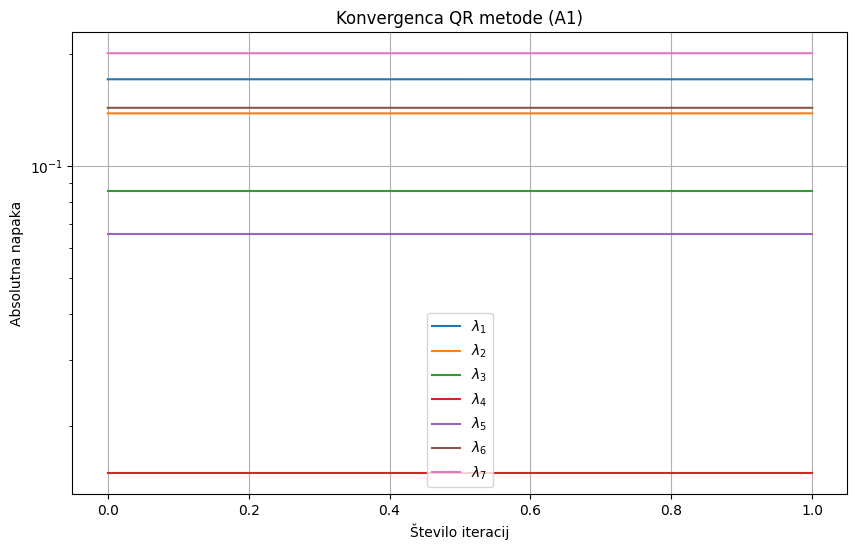


Potenčna metoda (A1):
  Največja lastna vrednost: 1000.1908262021
  Število iteracij: 1000


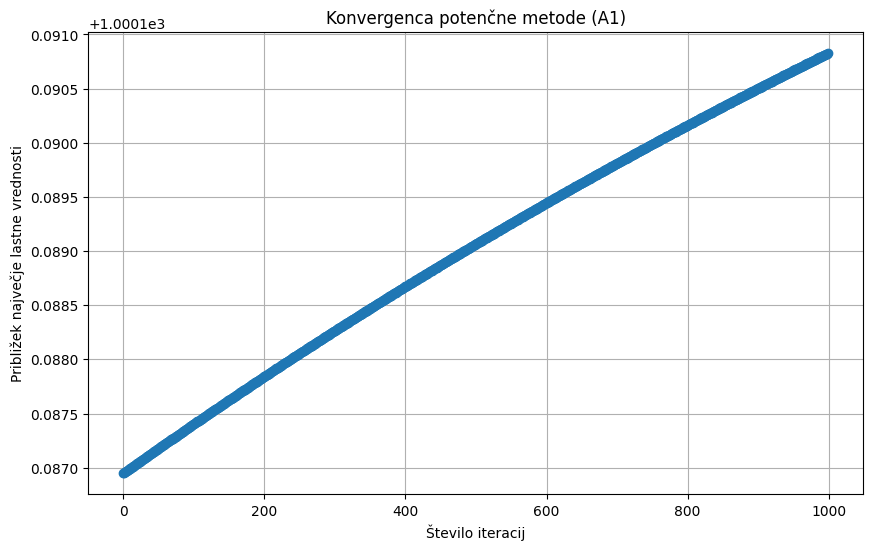


Jacobijeva metoda (A1):
  Lastne vrednosti: [-5.91454710e-02  6.61551532e-04  2.95960962e-03  8.99742925e-03
  2.02466734e-02  6.81154758e-02  1.00000001e+03]
  Število iteracij: 1000


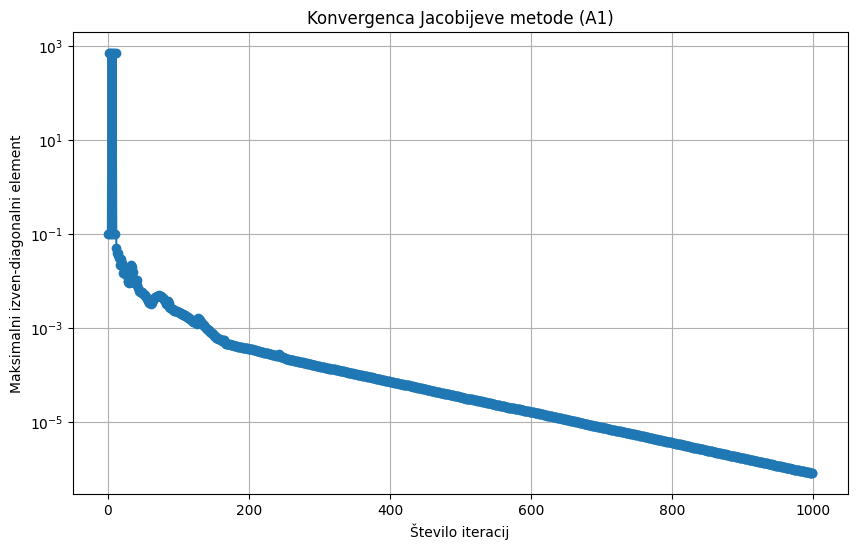


Sekularna metoda (A1):
  Lastne vrednosti: [ 993.53432322  993.53432322  998.50624469  998.50624469 1004.45910709
 1004.45910709 1007.00065   ]

QR metoda po tridiagonalizaciji (A1):
  Lastne vrednosti: [ 999.91652443 1000.00004041 1000.00332295 1000.01951319 1000.02019459
 1000.020202   1000.02020243]
  Število iteracij: 2


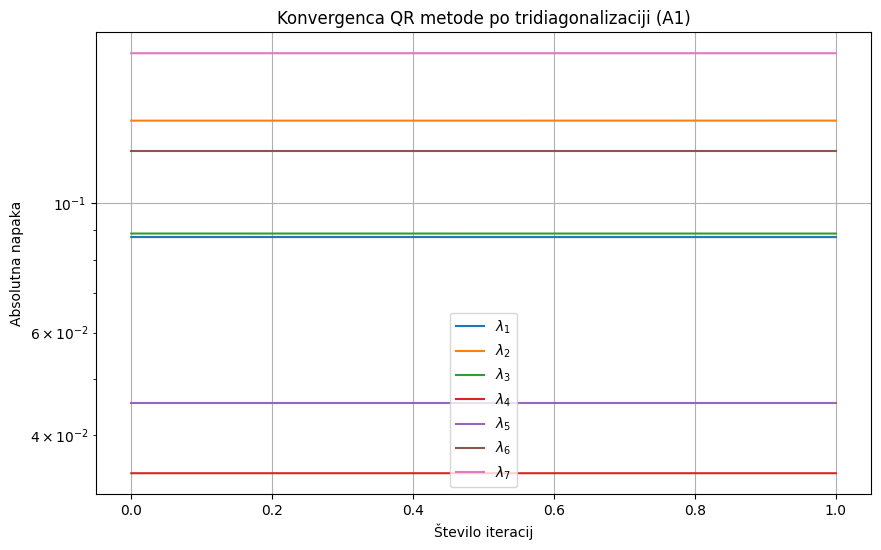

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh, qr, hessenberg
from numpy.linalg import norm
import pandas as pd

A1 = np.array([
    [1000., 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001],
    [0.1, 1000., 0.1, 0.01, 0.001, 0.0001, 0.00001],
    [0.01, 0.1, 1000., 0.1, 0.01, 0.001, 0.0001],
    [0.001, 0.01, 0.1, 1000., 0.1, 0.01, 0.001],
    [0.0001, 0.001, 0.01, 0.1, 1000., 0.1, 0.01],
    [0.00001, 0.0001, 0.001, 0.01, 0.1, 1000., 0.1],
    [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1000.]
])

A2 = np.array([
    [1e6, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001],
    [0.1, 1e6, 0.1, 0.01, 0.001, 0.0001, 0.00001],
    [0.01, 0.1, 1e6, 0.1, 0.01, 0.001, 0.0001],
    [0.001, 0.01, 0.1, 1e6, 0.1, 0.01, 0.001],
    [0.0001, 0.001, 0.01, 0.1, 1e6, 0.1, 0.01],
    [0.00001, 0.0001, 0.001, 0.01, 0.1, 1e6, 0.1],
    [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1e6]
])

def qr_iterative(A, max_iter=1000, tol=1e-10):
    A_k = A.copy()
    eig_hist = []
    for i in range(max_iter):
        Q, R = qr(A_k)
        A_k = R @ Q
        eig_vals = np.sort(np.diag(A_k))
        eig_hist.append(eig_vals)
        if i > 0 and np.allclose(eig_hist[-1], eig_hist[-2], atol=tol):
            break
    return eig_vals, i + 1, eig_hist

def power_method(A, max_iter=1000, tol=1e-10):
    n = A.shape[0]
    x = np.ones(n)
    x = x / norm(x)
    eigenvalue_old = 0
    eigen_hist = []
    for i in range(max_iter):
        y = A.dot(x)
        eigenvalue = np.dot(x, y)
        eigen_hist.append(eigenvalue)
        x = y / norm(y)
        if abs(eigenvalue - eigenvalue_old) < tol:
            break
        eigenvalue_old = eigenvalue
    return eigenvalue, x, i+1, eigen_hist

def jacobi_method(A, tol=1e-10, max_iter=1000):
    A = A.copy()
    n = A.shape[0]
    V = np.eye(n)
    offdiag_hist = []
    for iteration in range(max_iter):
        off_diag = np.triu(np.abs(A), k=1)
        p, q = np.unravel_index(np.argmax(off_diag), A.shape)
        max_off = np.max(off_diag)
        offdiag_hist.append(max_off)
        if max_off < tol:
            break
        phi = 0.5 * np.arctan2(2 * A[p, q], A[q, q] - A[p, p])
        c = np.cos(phi)
        s = np.sin(phi)
        Ap = A[p, :].copy()
        Aq = A[q, :].copy()
        A[p, :] = c * Ap - s * Aq
        A[q, :] = s * Ap + c * Aq
        A[:, p] = A[p, :]
        A[:, q] = A[q, :]
        Vp = V[:, p].copy()
        Vq = V[:, q].copy()
        V[:, p] = c * Vp - s * Vq
        V[:, q] = s * Vp + c * Vq
    eigenvalues = np.diag(A)
    idx = np.argsort(eigenvalues)
    return eigenvalues[idx], V[:, idx], iteration+1, offdiag_hist

def to_tridiagonal(A):
    H, Q = hessenberg(A, calc_q=True)
    return H, Q

def secular_method(A):
    poly_coeffs = np.poly(A)
    roots = np.roots(poly_coeffs)
    roots = np.real_if_close(roots, tol=1e-8)
    return np.sort(roots.real)

def plot_convergence(hist, true_vals, title):
    hist = np.array(hist)
    errors = np.abs(hist - true_vals)
    plt.figure(figsize=(10, 6))
    for i in range(hist.shape[1]):
        plt.plot(errors[:, i], label=f'$\lambda_{i+1}$')
    plt.yscale('log')
    plt.xlabel('Število iteracij')
    plt.ylabel('Absolutna napaka')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    fname = title.replace(" ", "_") + ".png"
    plt.savefig(fname)
    plt.show()

def plot_power_convergence(hist, title):
    plt.figure(figsize=(10, 6))
    plt.plot(hist, marker='o')
    plt.xlabel('Število iteracij')
    plt.ylabel('Približek največje lastne vrednosti')
    plt.title(title)
    plt.grid(True)
    fname = title.replace(" ", "_") + ".png"
    plt.savefig(fname)
    plt.show()

def plot_jacobi_convergence(offdiag_hist, title):
    plt.figure(figsize=(10, 6))
    plt.plot(offdiag_hist, marker='o')
    plt.xlabel('Število iteracij')
    plt.ylabel('Maksimalni izven-diagonalni element')
    plt.yscale('log')
    plt.title(title)
    plt.grid(True)
    fname = title.replace(" ", "_") + ".png"
    plt.savefig(fname)
    plt.show()

print("=== Primerjava metod na matriki A1 ===\n")
eigvals_A1_ref, eigvecs_A1_ref = eigh(A1)
print("Referenčne lastne vrednosti (eigh):\n", np.sort(eigvals_A1_ref))
qr_vals_A1, qr_iters_A1, qr_hist_A1 = qr_iterative(A1)
print("\nQR metoda:")
print("  Lastne vrednosti:", qr_vals_A1)
print("  Število iteracij:", qr_iters_A1)
plot_convergence(qr_hist_A1, np.sort(eigvals_A1_ref), 'Konvergenca QR metode (A1)')
power_val_A1, power_vec_A1, power_iters_A1, power_hist_A1 = power_method(A1)
print("\nPotenčna metoda (A1):")
print("  Največja lastna vrednost: {:.10f}".format(power_val_A1))
print("  Število iteracij:", power_iters_A1)
plot_power_convergence(power_hist_A1, 'Konvergenca potenčne metode (A1)')
jacobi_eig_A1, jacobi_vec_A1, jacobi_iters_A1, jacobi_offdiag_A1 = jacobi_method(A1)
print("\nJacobijeva metoda (A1):")
print("  Lastne vrednosti:", jacobi_eig_A1)
print("  Število iteracij:", jacobi_iters_A1)
plot_jacobi_convergence(jacobi_offdiag_A1, 'Konvergenca Jacobijeve metode (A1)')
secular_eig_A1 = secular_method(A1)
print("\nSekularna metoda (A1):")
print("  Lastne vrednosti:", secular_eig_A1)
H_A1, Q_A1 = to_tridiagonal(A1)
qr_vals_A1_tri, qr_iters_A1_tri, qr_hist_A1_tri = qr_iterative(H_A1)
print("\nQR metoda po tridiagonalizaciji (A1):")
print("  Lastne vrednosti:", np.sort(qr_vals_A1_tri))
print("  Število iteracij:", qr_iters_A1_tri)
plot_convergence(qr_hist_A1_tri, np.sort(eigvals_A1_ref), 'Konvergenca QR metode po tridiagonalizaciji (A1)')





=== Primerjava metod na matriki A2 ===

Referenčne lastne vrednosti (eigh):
 [ 999999.82908751  999999.86159725  999999.91465698  999999.98506851
 1000000.06555199 1000000.14323324 1000000.20080452]

QR metoda:
  Lastne vrednosti: [ 999999.99999996 1000000.         1000000.         1000000.
 1000000.         1000000.         1000000.00000004]
  Število iteracij: 2


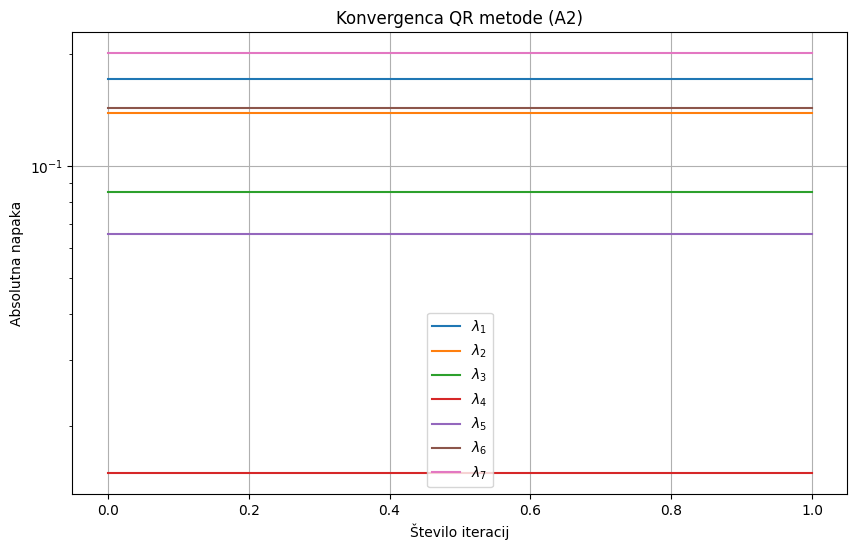


Potenčna metoda (A2):
  Največja lastna vrednost: 1000000.1869534890
  Število iteracij: 1000


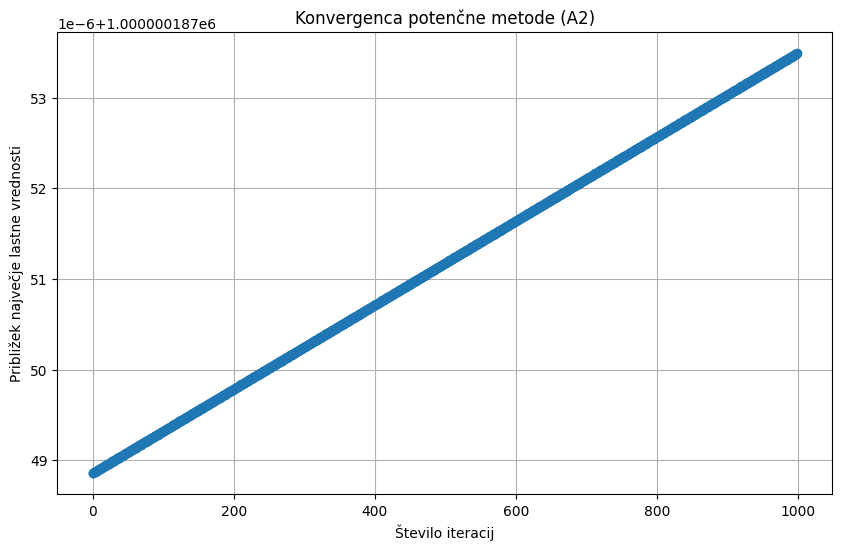


Jacobijeva metoda (A2):
  Lastne vrednosti: [-5.88827685e-02  5.99406719e-04  2.86430653e-03  9.02062492e-03
  2.00431923e-02  6.79587050e-02  1.00000000e+06]
  Število iteracij: 1000


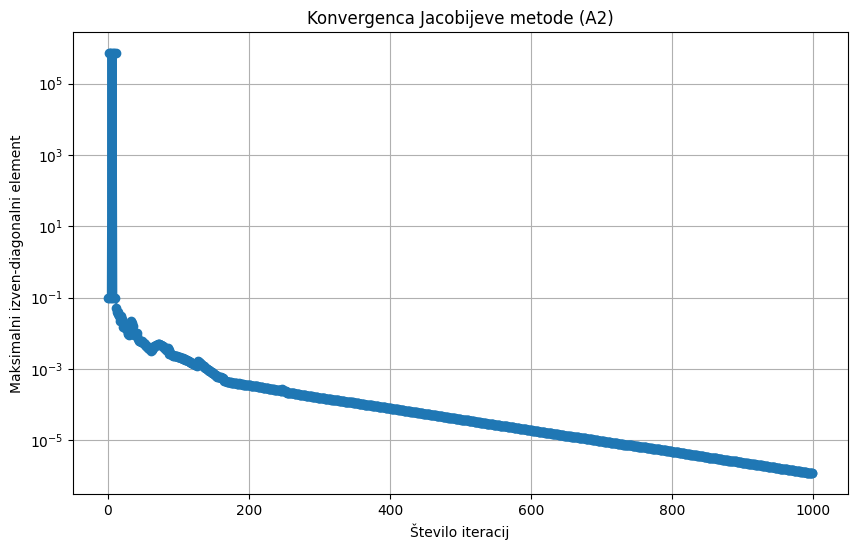


Sekularna metoda (A2):
  Lastne vrednosti: [ 990675.5585865   990675.5585865   997673.05025935  997673.05025935
 1006457.69642042 1006457.69642042 1010387.38946744]

QR metoda po tridiagonalizaciji (A2):
  Lastne vrednosti: [ 999999.91654727 1000000.00000004 1000000.00333925 1000000.01951479
 1000000.02019462 1000000.020202   1000000.02020202]
  Število iteracij: 2


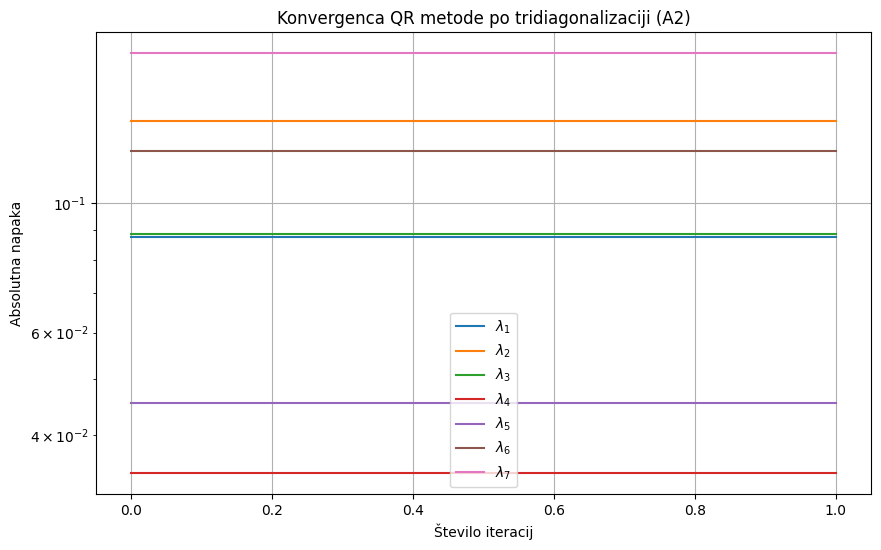


Tabela za sekularno metodo:
 Eigenvalue Index  Secular Method (A1)  Reference (A1)  Secular Method (A2)  Reference (A2)
                1           993.534323      999.829088         9.906756e+05    9.999998e+05
                2           993.534323      999.861597         9.906756e+05    9.999999e+05
                3           998.506245      999.914657         9.976731e+05    9.999999e+05
                4           998.506245      999.985069         9.976731e+05    1.000000e+06
                5          1004.459107     1000.065552         1.006458e+06    1.000000e+06
                6          1004.459107     1000.143233         1.006458e+06    1.000000e+06
                7          1007.000650     1000.200805         1.010387e+06    1.000000e+06


In [9]:
print("\n\n=== Primerjava metod na matriki A2 ===\n")
eigvals_A2_ref, eigvecs_A2_ref = eigh(A2)
print("Referenčne lastne vrednosti (eigh):\n", np.sort(eigvals_A2_ref))
qr_vals_A2, qr_iters_A2, qr_hist_A2 = qr_iterative(A2)
print("\nQR metoda:")
print("  Lastne vrednosti:", qr_vals_A2)
print("  Število iteracij:", qr_iters_A2)
plot_convergence(qr_hist_A2, np.sort(eigvals_A2_ref), 'Konvergenca QR metode (A2)')
power_val_A2, power_vec_A2, power_iters_A2, power_hist_A2 = power_method(A2)
print("\nPotenčna metoda (A2):")
print("  Največja lastna vrednost: {:.10f}".format(power_val_A2))
print("  Število iteracij:", power_iters_A2)
plot_power_convergence(power_hist_A2, 'Konvergenca potenčne metode (A2)')
jacobi_eig_A2, jacobi_vec_A2, jacobi_iters_A2, jacobi_offdiag_A2 = jacobi_method(A2)
print("\nJacobijeva metoda (A2):")
print("  Lastne vrednosti:", jacobi_eig_A2)
print("  Število iteracij:", jacobi_iters_A2)
plot_jacobi_convergence(jacobi_offdiag_A2, 'Konvergenca Jacobijeve metode (A2)')
secular_eig_A2 = secular_method(A2)
print("\nSekularna metoda (A2):")
print("  Lastne vrednosti:", secular_eig_A2)
H_A2, Q_A2 = to_tridiagonal(A2)
qr_vals_A2_tri, qr_iters_A2_tri, qr_hist_A2_tri = qr_iterative(H_A2)
print("\nQR metoda po tridiagonalizaciji (A2):")
print("  Lastne vrednosti:", np.sort(qr_vals_A2_tri))
print("  Število iteracij:", qr_iters_A2_tri)
plot_convergence(qr_hist_A2_tri, np.sort(eigvals_A2_ref), 'Konvergenca QR metode po tridiagonalizaciji (A2)')

# Tabela za sekularno metodo
table_data = {
    "Eigenvalue Index": list(range(1, len(secular_eig_A1)+1)),
    "Secular Method (A1)": secular_eig_A1,
    "Reference (A1)": np.sort(eigvals_A1_ref),
    "Secular Method (A2)": secular_eig_A2,
    "Reference (A2)": np.sort(eigvals_A2_ref)
}
df = pd.DataFrame(table_data)
print("\nTabela za sekularno metodo:")
print(df.to_string(index=False))
